In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

df = pd.read_csv("./datasets/seat.csv", encoding="ISO-8859-1")

In [ ]:
X = df[['content']]
X.columns = ['Reviews']
X.describe()

In [33]:
Y = df[['recommended']]
Y.columns = ['Recommended']
Y.describe()

,Recommended
count,1258.00000
mean,0.36407
std,0.48136
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [10]:
contractions = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have",
    "you're":"you are",
    "You're":"you are",
    "you'll": "you will",
    "You'll":"You will"
}

In [ ]:
# Contractions Removal

import string
reviews = X['Reviews'].tolist()
reviws_after_contractions_removal = []

for item in reviews:
    new_item = ' '.join(str(contractions.get(word,word)) for word in item.split())
    reviws_after_contractions_removal.append(new_item)
    
print(reviws_after_contractions_removal)


In [ ]:
reviws_after_punctuations_removal = []
regex = r"[\x96\x92\x94x93\x85\t]"

for item in reviws_after_contractions_removal:
    text = item.translate(str.maketrans('','',string.punctuation))
    text = re.sub(regex,"",text)
    reviws_after_punctuations_removal.append(text)
    
print(reviws_after_punctuations_removal)

In [ ]:
# step  4: Tokenization [[1st review tokens], [2nd review tokens], ...]
from nltk.tokenize import word_tokenize
tokens = []

for item in reviws_after_punctuations_removal:
    tokens.append(word_tokenize(item))

print(tokens)


In [ ]:
from nltk.corpus import stopwords
tokens_after_stopwords_removal = []

for doc in tokens:
    new_vector = []
    for word in doc:
        if not word in stopwords.words('english'):
            new_vector.append(word)
    tokens_after_stopwords_removal.append(new_vector)

print(tokens_after_stopwords_removal)   

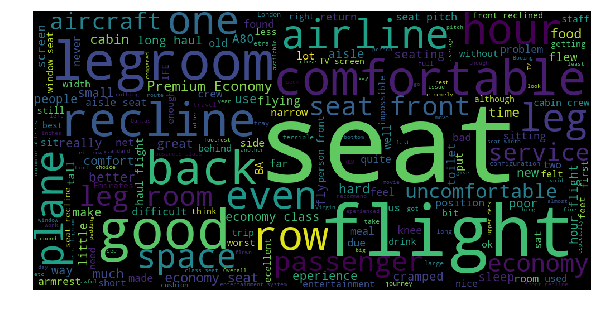

In [21]:
from wordcloud import WordCloud
words_all = []

for item in tokens_after_stopwords_removal:
    words_all = words_all+item

wordcl = WordCloud(width=1000, height= 500).generate(" ".join(words_all))

plt.figure(figsize = (10,7))
plt.imshow(wordcl)
plt.axis("Off")
plt.show()

In [22]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.corpus import sentiwordnet as swn

pos_tokens = [nltk.pos_tag(token) for token in tokens_after_stopwords_removal]

print(pos_tokens)


[[('LHR', 'NNP'), ('Larnaca', 'NNP'), ('return', 'VBP'), ('Plane', 'NNP'), ('clean', 'JJ'), ('good', 'JJ'), ('condition', 'NN'), ('Drinks', 'NNP'), ('served', 'VBD'), ('throughout', 'IN'), ('flights', 'NNS'), ('Food', 'NNP'), ('good', 'NN'), ('Would', 'NNP'), ('definitely', 'RB'), ('hesitate', 'VBP'), ('use', 'JJ'), ('airline', 'NN'), ('European', 'JJ'), ('trips', 'NNS')], [('For', 'IN'), ('short', 'JJ'), ('haul', 'NN'), ('airline', 'NN'), ('seats', 'NNS'), ('good', 'JJ'), ('I', 'PRP'), ('find', 'VBP'), ('seats', 'JJ'), ('comfortable', 'JJ'), ('plenty', 'NN'), ('leg', 'NN'), ('room', 'NN')], [('The', 'DT'), ('seats', 'NNS'), ('bit', 'VBP'), ('tight', 'JJ'), ('bearable', 'JJ'), ('If', 'IN'), ('courteous', 'JJ'), ('others', 'NNS'), ('courteous', 'JJ'), ('Everyone', 'NNP'), ('seat', 'NN'), ('ask', 'NN'), ('neighbor', 'NN'), ('front', 'VBD'), ('back', 'RB'), ('issues', 'NNS'), ('come', 'VBP'), ('good', 'JJ')], [('Appeared', 'NNP'), ('new', 'JJ'), ('Good', 'NNP'), ('PTV', 'NNP'), ('entertai

In [30]:
lemmatizer = WordNetLemmatizer()
recommended = [] 

def cutom_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wn.ADJ
    elif nltk_pos.startswith('V'):
        return wn.VERB
    elif nltk_pos.startswith('N'):
        return wn.NOUN
    elif nltk_pos.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

for item in pos_tokens:
    sentiment = 0.0
    for word,tag in item:
        lemma = lemmatizer.lemmatize(word, cutom_wordnet_pos(tag))
        if not lemma:
            continue
        
        synsets = wn.synsets(lemma,cutom_wordnet_pos(tag)) # synonyms 
        
        if not synsets:
            continue
        
        synset = synsets[0]
        # print(synset.name())
        
        swn_synset = swn.senti_synset(synset.name())
        
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        
        if sentiment <= 0:
            sentiment = 0
        else:
            sentiment = 1
        
        recommended.append(sentiment)
        

print(recommended)
        

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [34]:
# error

from sklearn import metrics
metrics.accuracy_score(Y, recommended)

ValueError: Found input variables with inconsistent numbers of samples: [1258, 45005]